In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gaussian noise:

In [3]:
def add_gaussian_noise(image, mean=0, std=25):
    gauss = np.random.normal(mean, std, image.shape).astype('float32')
    noisy_image = cv2.add(image.astype('float32'), gauss)
    return np.clip(noisy_image, 0, 255).astype('uint8')


 Salt-and-Pepper noise:

In [4]:
def add_salt_and_pepper_noise(image, prob=0.02):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    # Add salt
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image


# Apply Filters
Mean Filter:

In [5]:
def apply_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))


# Median Filter:

In [6]:
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)


# Sharpening Filter:

In [7]:
def apply_sharpening_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)


# Evaluation and Comparison

In [10]:
image = cv2.imread('/content/Beautiful girl.jpg', cv2.IMREAD_GRAYSCALE)

# Apply noise:

In [11]:
gaussian_noisy_image = add_gaussian_noise(image)
sp_noisy_image = add_salt_and_pepper_noise(image)

# Apply Filter

In [12]:
gaussian_mean = apply_mean_filter(gaussian_noisy_image)
gaussian_median = apply_median_filter(gaussian_noisy_image)
gaussian_sharpened = apply_sharpening_filter(gaussian_noisy_image)

sp_mean = apply_mean_filter(sp_noisy_image)
sp_median = apply_median_filter(sp_noisy_image)
sp_sharpened = apply_sharpening_filter(sp_noisy_image)


# Visualization

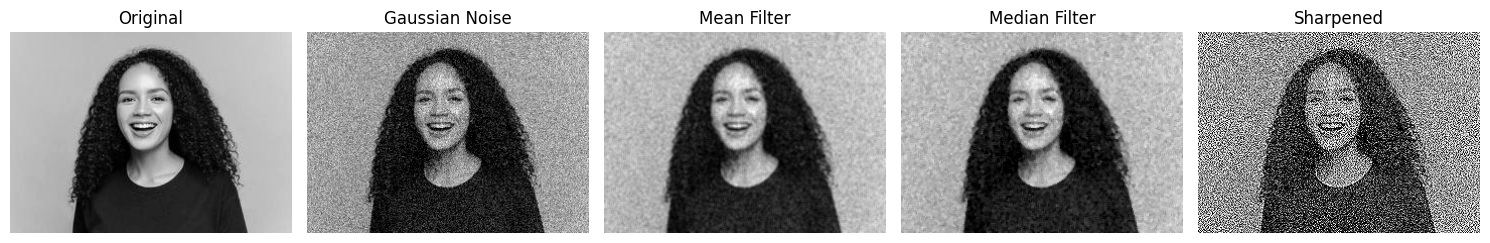

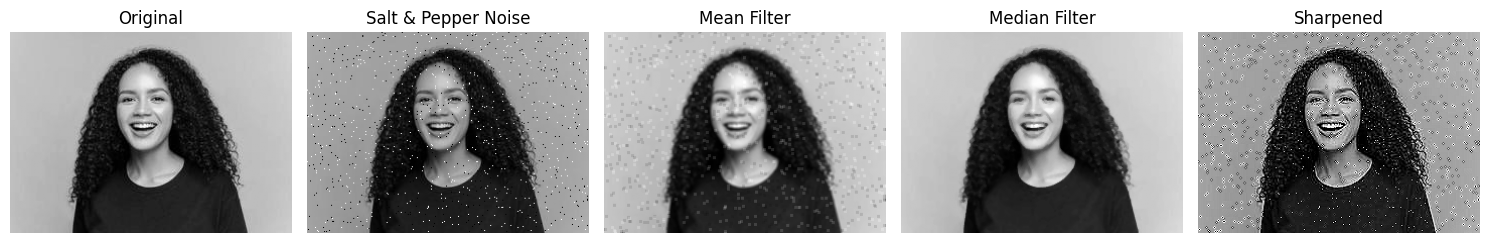

In [13]:
def display_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(
    [image, gaussian_noisy_image, gaussian_mean, gaussian_median, gaussian_sharpened],
    ["Original", "Gaussian Noise", "Mean Filter", "Median Filter", "Sharpened"],
    rows=1, cols=5
)

display_images(
    [image, sp_noisy_image, sp_mean, sp_median, sp_sharpened],
    ["Original", "Salt & Pepper Noise", "Mean Filter", "Median Filter", "Sharpened"],
    rows=1, cols=5
)
